**Demo for `teneva.func.demo.func_demo_michalewicz`**

---

This module contains analytical Michalewicz function for demo and tests.

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Class `FuncDemoMichalewicz`

Michalewicz function for demo and tests.

In [2]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoMichalewicz(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[ 0.00000000e+00 -1.45382977e-02 -3.70232531e-01 -3.26333212e-04]
0.0 -0.000326333211876712


Minimum value:

In [3]:
func = teneva.FuncDemoMichalewicz(d=2)  # Is known only in 2-D case (x_min)
print(func.x_min)                       # Argument for exact minimum
print(func.get_f_poi(func.x_min))       # Computed minimum
print(func.y_min)                       # Value of exact minimum

[2.2  1.57]
-1.801140718473825
-1.8013


In [4]:
func = teneva.FuncDemoMichalewicz(d=2)  # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

func = teneva.FuncDemoMichalewicz(d=5)  # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

func = teneva.FuncDemoMichalewicz(d=10) # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

-1.8013
-4.687658
-9.66015


Let try to check the min-max values for 2D case by simple brute-force:

In [5]:
func = teneva.FuncDemoMichalewicz(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Michalewicz
y_min real = -1.8013000e+00; x_min real = [2.2  1.57]
y_min appr = -1.8012987e+00; x_min appr = [2.20269699 1.5704821 ]
y_max appr = 0.0000000e+00; x_max appr = [0. 0.]


We can plot the function for 2D case:

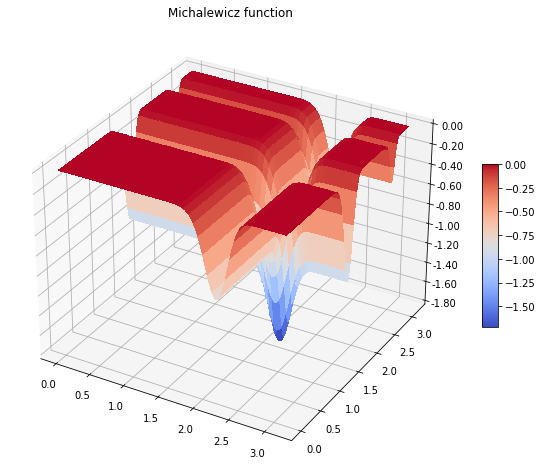

In [6]:
teneva.FuncDemoMichalewicz(d=2).plot()

Note that for this function, we can construct the TT-cores of its TT-decomposition explicitly:

In [7]:
func = teneva.FuncDemoMichalewicz(d=100)
func.set_grid(n=2**14, kind='uni')
func.cores()

We can check the accuracy of approximation:

In [8]:
func.build_tst_ind(m=1.E+4)
func.check()
func.info()

Michalewicz     [CORES        ] > error: 2.6e-16 | rank:  2.0 | time:   0.155


It is also possible to calculate the function in the PyTorch format:

In [9]:
func = teneva.FuncDemoMichalewicz(d=10)

x1 = func.a + np.random.uniform(size=func.d) * (func.b - func.a)
y1 = func._calc(x1)

import torch
# torch.set_default_dtype(torch.float64)

x2 = torch.tensor(x1)
y2 = func._calc_pt(x2)

print(y1)
print(y2.numpy())

-1.5868128630522014
-1.5868122472881216


---